In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [ ]:
df = pd.read_csv('NewSpiral.csv')
df.sample(frac = 1).head()

,_ID_EXAM,IMAGE_NAME,ID_PATIENT,CLASS_TYPE,GENDER,RIGH/LEFT-HANDED,AGE,RMS,MAX_BETWEEN_ET_HT,MIN_BETWEEN_ET_HT,STD_DEVIATION_ET_HT,MRT,MAX_HT,MIN_HT,STD_HT,CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT
44,H11,sp2-H11.jpg,98,1,M,R,53,4919.725723,7837.956478,36567.44879,0.000049,31.833399,184.772639,0.000000,1872.064528,0.155116
209,P9,mea3-P9.jpg,253,2,M,L,60,5050.868671,7881.742180,38055.42185,0.000864,28.175374,185.176717,0.021305,1909.722225,0.262136
179,P10,mea2-P10.jpg,261,2,F,R,61,5782.250906,7007.501102,40371.60628,0.046843,27.683619,179.358856,0.013095,1841.961696,0.323232
150,P12,mea1-P12.jpg,273,2,M,R,57,4227.763362,6449.614530,34402.05021,0.015033,21.056191,182.585399,0.000000,1423.360713,0.198697
140,P1,mea1-P1.jpg,143,2,M,R,56,4122.821925,5342.548781,32129.72896,0.463074,21.501732,194.043210,0.019599,1563.424751,0.142857


In [ ]:
df = df.drop(['_ID_EXAM', 'IMAGE_NAME', 'ID_PATIENT'], axis=1)
df.sample(frac = 1).head()

,CLASS_TYPE,GENDER,RIGH/LEFT-HANDED,AGE,RMS,MAX_BETWEEN_ET_HT,MIN_BETWEEN_ET_HT,STD_DEVIATION_ET_HT,MRT,MAX_HT,MIN_HT,STD_HT,CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT
240,2,M,L,60,3876.292641,5975.387461,31963.63761,0.004764,17.975191,171.763752,0.046853,1140.392220,0.287097
107,1,F,R,56,4682.457109,6198.464492,36033.49830,0.443139,28.082219,171.181283,0.113909,1585.706992,0.323718
244,2,F,R,48,3883.813710,7036.446903,32600.67042,0.000000,20.768952,172.884615,0.021385,1291.825662,0.228840
171,2,M,R,56,4559.467450,6949.142588,35707.65327,0.077177,21.232648,174.620646,0.010904,1445.584044,0.195513
259,2,F,R,63,4989.388643,6494.479549,35465.93588,0.592189,29.318362,179.071929,0.059952,2001.042984,0.156716


In [ ]:
df = df.rename(columns={"CLASS_TYPE": "CLASS", "RIGH/LEFT-HANDED": "HAND", "CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT": "NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT"})
df.sample(frac = 1).head()

,CLASS,GENDER,HAND,AGE,RMS,MAX_BETWEEN_ET_HT,MIN_BETWEEN_ET_HT,STD_DEVIATION_ET_HT,MRT,MAX_HT,MIN_HT,STD_HT,NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT
215,2,M,R,62,5892.491366,6848.334403,36133.18231,0.039535,27.811522,173.185905,0.123715,1690.786849,0.195489
36,1,M,R,60,11023.612550,7671.118811,38517.64532,0.021818,27.547136,183.535468,0.096562,2032.568162,0.161765
49,1,M,R,51,5359.766659,5373.873319,36464.74661,0.003954,26.062842,172.651373,0.019022,2080.472941,0.201005
170,2,M,R,43,4622.310879,6820.934207,31329.35915,0.000000,22.162602,169.650391,0.000000,1429.403949,0.265372
142,2,M,R,38,4605.068060,6940.764086,36201.60163,0.006727,23.252230,173.622470,0.011017,1531.662606,0.236667


In [ ]:
print("no. of samples: " + str(len(df)))
print()
df.isna().sum()

no. of samples: 264



CLASS                                 0
GENDER                                0
HAND                                  0
AGE                                   0
RMS                                   0
MAX_BETWEEN_ET_HT                     0
MIN_BETWEEN_ET_HT                     0
STD_DEVIATION_ET_HT                   0
MRT                                   0
MAX_HT                                0
MIN_HT                                0
STD_HT                                0
NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT    0
dtype: int64

In [ ]:
cats=['GENDER', 'HAND']
cnts=['AGE', 'RMS', 'MAX_BETWEEN_ET_HT', 'MIN_BETWEEN_ET_HT', 'STD_DEVIATION_ET_HT', 'MRT', 'MAX_HT', 'MIN_HT', 'STD_HT', 'NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT']

dep='CLASS'

In [ ]:
df['GENDER'] = pd.Categorical(df.GENDER)
df['HAND'] = pd.Categorical(df.HAND)

trn_df,val_df = train_test_split(df, test_size=0.2)
trn_df[cats] = trn_df[cats].apply(lambda x: x.cat.codes)
val_df[cats] = val_df[cats].apply(lambda x: x.cat.codes)

[Text(0.5, 1.0, 'Left/Right hand distribution')]

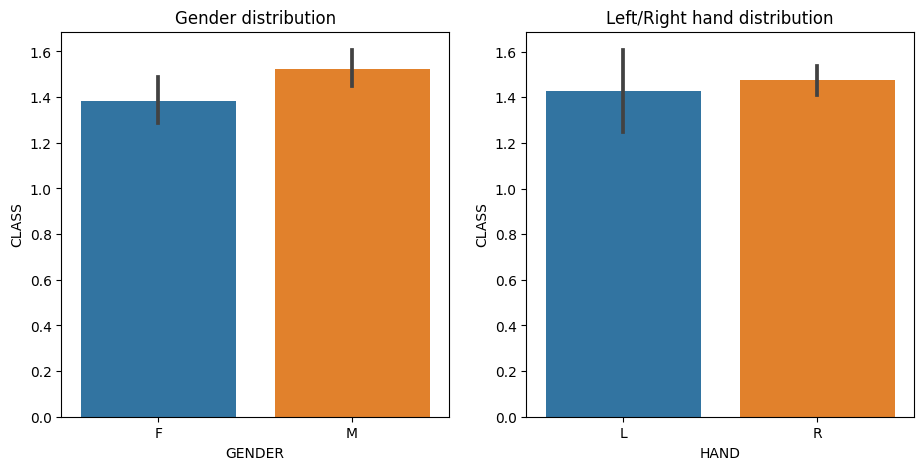

In [ ]:
fig,axs = plt.subplots(1,2, figsize=(11,5))

sns.barplot(data=df, y=dep, x="GENDER", ax=axs[0]).set(title="Gender distribution")
sns.barplot(data=df, y=dep, x="HAND", ax=axs[1]).set(title="Left/Right hand distribution")

In [ ]:
df['GENDER'] = pd.Categorical(df.GENDER)
df['HAND'] = pd.Categorical(df.HAND)

trn_df,val_df = train_test_split(df, test_size=0.2)
trn_df[cats] = trn_df[cats].apply(lambda x: x.cat.codes)
val_df[cats] = val_df[cats].apply(lambda x: x.cat.codes)

In [ ]:
def xs_y(df):
    xs = df[cats+cnts].copy()
    return xs,df[dep] if dep in df else None

trn_xs,trn_y = xs_y(trn_df)
val_xs,val_y = xs_y(val_df)

In [ ]:
m = DecisionTreeClassifier(max_leaf_nodes=4).fit(trn_xs, trn_y)

In [ ]:
import re
import graphviz

def draw_tree(t, df, size=10, ratio=0.6, precision=2, **kwargs):
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True,
                      special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))

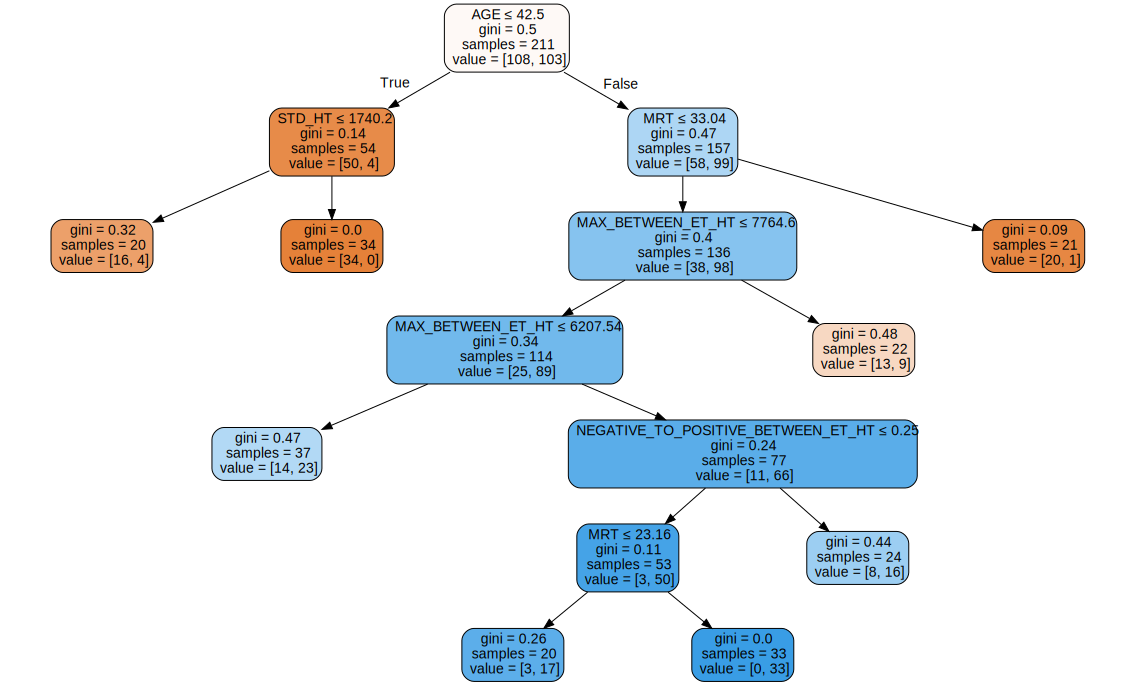

In [ ]:
m = DecisionTreeClassifier(min_samples_leaf=20)
m.fit(trn_xs, trn_y)
draw_tree(m, trn_xs, size=20)

In [ ]:
mean_absolute_error(val_y, m.predict(val_xs))

0.2830188679245283

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(100, min_samples_leaf=5)
rf.fit(trn_xs, trn_y);
mean_absolute_error(val_y, rf.predict(val_xs))

0.18867924528301888

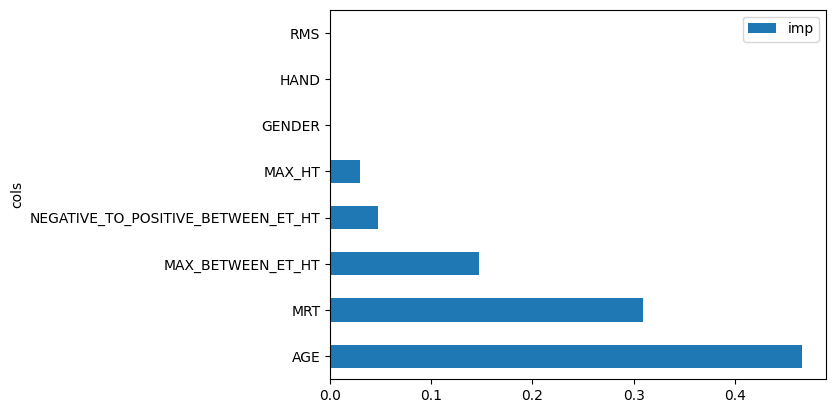

In [ ]:
datax = {'cols': trn_xs.columns, 'imp': m.feature_importances_}
dfx = pd.DataFrame(datax)

df_sorted = dfx.sort_values(by='imp', ascending=False)
df_top_n = df_sorted.head(8)

df_top_n.plot(x='cols', y='imp', kind='barh')

plt.show()